In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
path_video = '../videos/ballet1.mp4'

# Reproducir un video 

In [4]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="""+path_video+""" type="video/mp4">
    </video>
""")

# Extraer frames de un video

In [5]:
img_height = 192
img_width = 192

def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]  

def load_video(path, resize=(img_height, img_width)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)
    finally:
        cap.release()
    return np.array(frames) / 255.0


In [6]:
frames = load_video(path_video)
print(len(frames))

2175


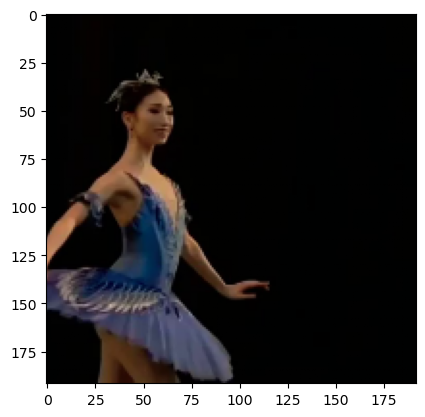

In [7]:
plt.imshow(frames[0])

# Download a video from Youtube

In [21]:
!python -m pip install pytube

In [24]:
from pytube import YouTube 

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")

  
link = "https://youtu.be/hqTuzs6Mdg4"
Download(link)

Download is completed successfully
